In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

from os.path import join

plt.style.use(["seaborn", "thesis"])

/home/jo/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
plt.rc("figure", figsize=(8,4))

# Dataset 

In [3]:
basis = "6-311++g**"
#basis = "sto-3g"
#model_path="../../models/DescriptorC/" + target + "/"

In [4]:
from SCFInitialGuess.utilities.dataset import Data

target = "P"

data = Data()

In [5]:
path = "../thesis/dataset/ethen0/"
postfix = "ethen0_" + basis
molecules = np.load(path + "molecules" + postfix + ".npy")
S = np.load(path + "S" + postfix + ".npy")
P = np.load(path + "P" + postfix + ".npy")

dim = 26
species = "C"

data._package_and_append(S, P, molecules, 0.8, 0.8)

# SAD

In [15]:
from pyscf.scf import hf

p_sad = [hf.init_guess_by_atom(mol.get_pyscf_molecule()) for mol in molecules]
p_gwh = [hf.init_guess_by_wolfsberg_helmholtz(mol.get_pyscf_molecule()) for mol in molecules]

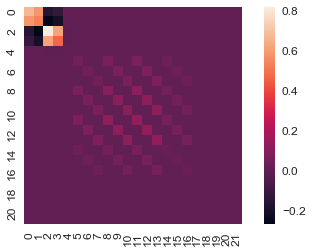

In [33]:
from SCFInitialGuess.utilities.constants import number_of_basis_functions as N_BASIS
n_c = N_BASIS[basis]["C"]

sns.heatmap(p_sad[0][0:n_c, 0:n_c], square=True)

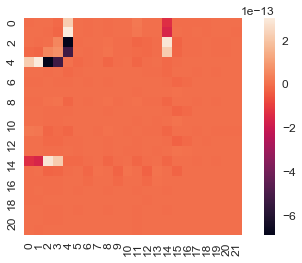

In [22]:


p = p_sad[14].copy()
#p = p_gwh[0].copy()
#p = P[4].copy()


def block_diff(pp):
    return pp[0:n_c, 0:n_c] - pp[n_c:(2*n_c), n_c:(2*n_c)]


sns.heatmap(
    block_diff(p), 
    square=True
)

# Average over Dataset

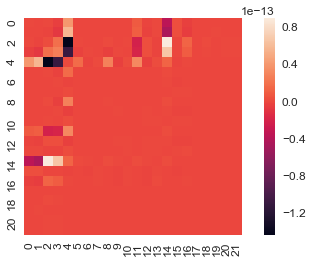

In [29]:
diff = np.array([block_diff(p) for p in p_sad])

sns.heatmap(np.mean(diff, 0), square=True)

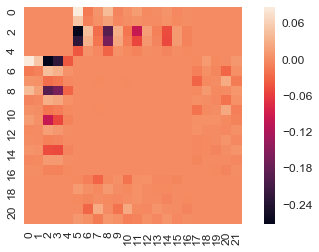

In [30]:
diff = np.array([block_diff(p) for p in p_gwh])

sns.heatmap(np.mean(diff, 0), square=True)

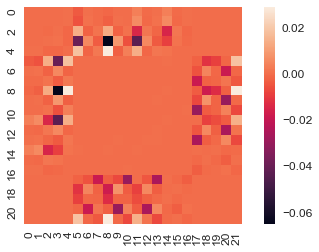

In [31]:
diff = np.array([block_diff(p) for p in P])

sns.heatmap(np.mean(diff, 0), square=True)